# Project 2: Prediction of Ames Housing Sale Price  
--- 
- [EDA and Cleaning](./1_EDA_and_Cleaning.ipynb) 
- [Preprocessing and Feature Engineering](./2_Preprocessing_and_Feature_Engineering.ipynb)
- [Model Benchmarks](./3_Model_Benchmarks.ipynb)
- <b>Model Tuning</b>
- [Production Model and Insights](./5_Production_Model_and_Insights.ipynb)

In [56]:
#Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score

--- 
## Overview 

In the previous notebook, the Elastic Net regression model produced a high r2 score of 0.925 and 0.908 for the train and test sets respectively, and an RMSE of 24144. Despite this, the model needs to be tuned by narrowing the features from 182 features to a more manageable number so that the model is more generalisable and for inferences about the data to be easily made.

In this notebook, the model will be further tuned by selecting the most apppropriate features to be included in the features matrix. This will be done by assessing the features' coefficients after they have been modelled. This model will be used as the production model in the next notebook. 

--- 
## Contents 

- [Features selection](#Features-selection)
- [Determining the best regression model](#Determining-the-best-regression-model)
- [Dealing with outliers](#Dealing-with-outliers) 
- [Conclusion](#Conclusion)

---
## Features Selection 

Although the best performing regression model (as seen in the previous notebook) is the Elastic Net model, I will use Lasso regression, which regularizes by reducing coefficients to zero, to determine which features should be dropped.

In [57]:
#importing train_dummies dataset

train_dummies = pd.read_csv('../datasets/train_dummies.csv')
print(train_dummies.shape)
train_dummies.head()

(2046, 194)


,id,lotfrontage,lotarea,lotshape,overallqual,overallcond,yearbuilt,masvnrarea,exterqual,bsmtqual,bsmtexposure,bsmtfinsf1,bsmtunfsf,heatingqc,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,fireplaces,fireplacequ,garagearea,garagecond,wooddecksf,mosold,yrsold,saleprice,porch,pool,garage,fireplace,bsmt,masvnr,agesold,remodelled,bighouse,2ndflr,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_sloped,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,garagefinish_None,garagefinish_RFn,garagefinish_Unf,paveddrive_P,paveddrive_Y
0,109,0.0,13517,1,6,8,1976,289.0,4,3,1,533.0,192.0,5,1479,0.0,2,1,3,1,4,0,0,475.0,3,0,3,2010,130500,1,0,1,0,1,1,34,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,43.0,11492,1,7,5,1996,132.0,4,4,1,637.0,276.0,5,2122,1.0,2,1,4,1,4,1,3,559.0,3,0,4,2009,220000,1,0,1,1,1,1,13,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,68.0,7922,0,5,7,1953,0.0,3,3,1,731.0,326.0,3,

In [58]:
# Creating features matrix (X) and target vector (y)
features = [col for col in train_dummies.columns if col !='saleprice']
X = train_dummies[features]
y = train_dummies['saleprice']

# train/test split train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#scale data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#optimal lasso alpha 
lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X_train, y_train)
lasso_optimal_alpha = lasso.alpha_

#instantiate model 
lasso_opt = Lasso(alpha=lasso_optimal_alpha)

#fit model 
lasso_opt.fit(X_train, y_train)

print (f" lasso regression score for train set is {lasso_opt.score(X_train, y_train)}")
print (f" lasso regression score for test set is {lasso_opt.score(X_test, y_test)}")

 lasso regression score for train set is 0.9224039683380123
 lasso regression score for test set is 0.9073404866925068


As seen in the scatter plot below, the lasso regression model has reduced the coefficients of 93 features in X to zero.

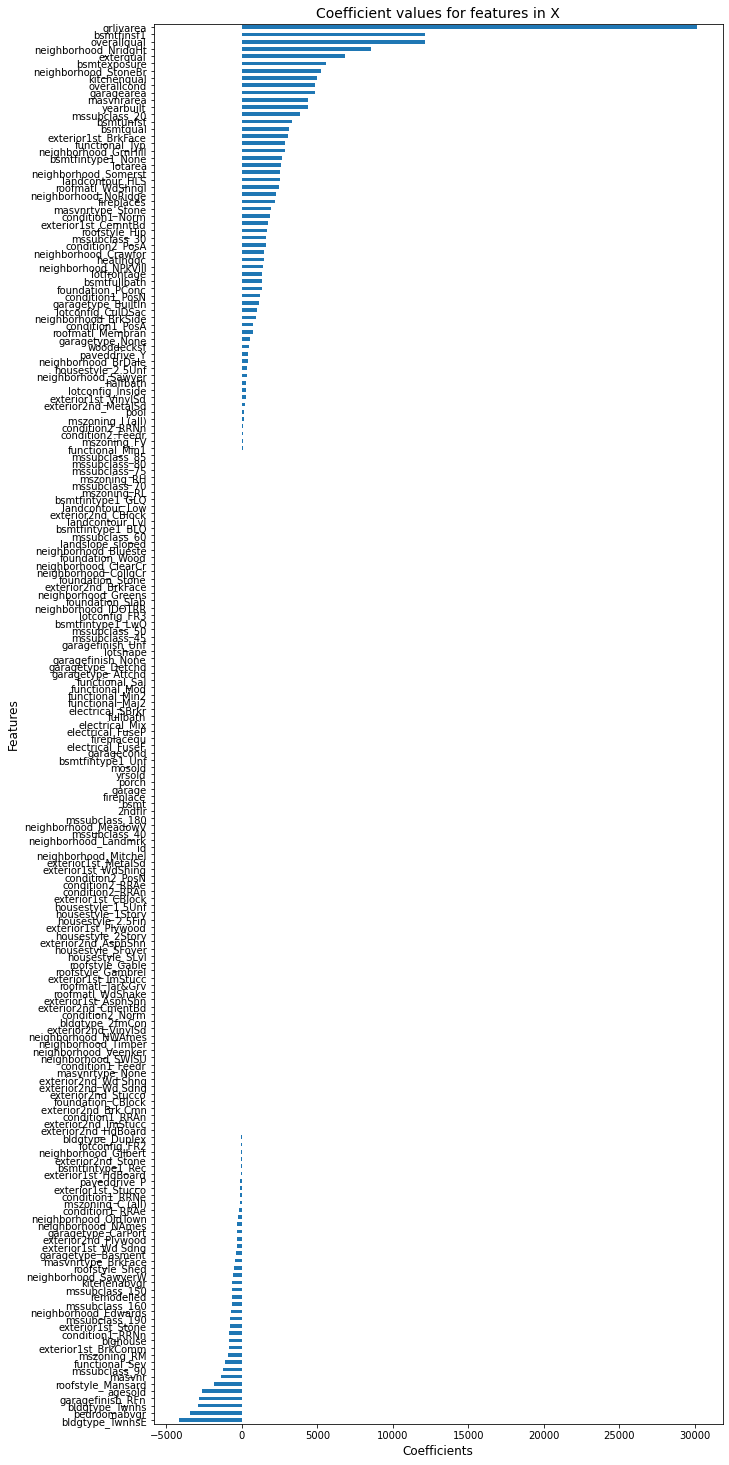

In [59]:
pd.Series(lasso_opt.coef_, index=X.columns).sort_values(ascending=True).plot.barh(figsize=(10,20))
plt.tight_layout()
plt.title('Coefficient values for features in X', fontsize =14)
plt.xlabel('Coefficients', fontsize=12)
plt.ylabel('Features', fontsize=12);

In [60]:
pd.Series(lasso_opt.coef_, index=features)[lasso_opt.coef_ == 0]

id                  -0.0
lotshape            -0.0
fullbath             0.0
fireplacequ          0.0
garagecond          -0.0
                    ... 
functional_Sal      -0.0
garagetype_Attchd   -0.0
garagetype_Detchd    0.0
garagefinish_None    0.0
garagefinish_Unf    -0.0
Length: 92, dtype: float64

In [61]:
lasso_coef_features = pd.Series(lasso_opt.coef_, index=features)

In [62]:
# Removing the 93 zero-ed out coefficients from new features 
new_features = lasso_coef_features[lasso_coef_features != 0].index
new_features.value_counts().sum()

101

### Running the Ridge regression model to further reduce number of features

After removing 93 features whose coefficients were reduced to 0 by lasso regression, I will now run a ridge regression model to further narrow down the number of features for the final production model. 
- I tried both elastic net and ridge regression models, and the 30 features with highest coefficients from the latter gave me a better r2 scores for the final production model and a better RMSE score from Kaggle

I have chosen to take the 30 "best performing" features that had the highest coefficient value in the elastic net test below to be part of the final features matrix, which will be used in the production model
- I have tried modelling with 20, 30, 40, 50, 60 features. 
- The model with 30 features produced the highest r2 score for the train and test sets
- It also performed the best in the Kaggle competition (28415), while keeping the features matrix small enough to be easily understood and interpreted

In [63]:
#Creating new features matrix (X1) and target vector(y)
X1 = train_dummies[new_features]
y = train_dummies['saleprice']

In [64]:
#train/test split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state = 42)

In [65]:
#scale data 
ss=StandardScaler()
ss.fit(X1_train)
X1_train = ss.transform(X1_train)
X1_test = ss.transform(X1_test)

In [66]:
#optimal Ridge alpha 
ridge = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
ridge = ridge.fit(X1_train, y_train)
ridge_optimal_alpha = ridge.alpha_

#instantiate ridge regression 
ridge_opt_new = Ridge(alpha=ridge_optimal_alpha)

#r2 score for ridge model with new_features 
ridge_opt_new.fit(X1_train, y_train)
print (f" ridge regression score for new train set is {ridge_opt_new.score(X1_train, y_train)}")
print (f" ridge regression score for new test set is {ridge_opt_new.score(X1_test, y_test)}")

 ridge regression score for new train set is 0.9248191929342073
 ridge regression score for new test set is 0.9071057688107721


In [67]:
#sorting features by coefficient values
pd.Series(ridge_opt_new.coef_, index=new_features).abs().sort_values(ascending=False)

grlivarea               27168.739201
bsmtfinsf1              12621.209472
overallqual             10932.760044
neighborhood_NridgHt     8411.965413
exterqual                6495.016751
                            ...     
mszoning_I (all)          266.916051
paveddrive_P              196.476985
masvnrtype_BrkFace        190.237508
kitchenabvgr               85.864793
exterior1st_HdBoard        54.777317
Length: 101, dtype: float64

In [68]:
# extracing the first 30 features with highest coefficient values
ridge_opt_features = pd.Series(ridge_opt_new.coef_, index=new_features).abs().sort_values(ascending=False)
ridge_opt_features[0:31]

grlivarea               27168.739201
bsmtfinsf1              12621.209472
overallqual             10932.760044
neighborhood_NridgHt     8411.965413
exterqual                6495.016751
garagearea               5653.310586
bsmtexposure             5613.947470
neighborhood_StoneBr     5528.915994
overallcond              5128.628307
masvnrarea               5115.638732
kitchenqual              5052.013637
bldgtype_TwnhsE          4949.642556
bsmtunfsf                4796.977479
bsmtfintype1_None        4503.837838
bsmtqual                 3996.900383
bldgtype_Twnhs           3951.387918
exterior1st_BrkFace      3671.786195
functional_Typ           3525.440951
agesold                  3458.670171
yearbuilt                3359.741402
neighborhood_GrnHill     3284.111376
garagefinish_RFn         3232.338521
mssubclass_20            3202.588226
roofmatl_WdShngl         3129.930199
masvnr                   2839.567296
neighborhood_NoRidge     2835.210300
bedroomabvgr             2777.974243
m

In [69]:
final_features = ridge_opt_features[:30].index
final_features

Index(['grlivarea', 'bsmtfinsf1', 'overallqual', 'neighborhood_NridgHt',
       'exterqual', 'garagearea', 'bsmtexposure', 'neighborhood_StoneBr',
       'overallcond', 'masvnrarea', 'kitchenqual', 'bldgtype_TwnhsE',
       'bsmtunfsf', 'bsmtfintype1_None', 'bsmtqual', 'bldgtype_Twnhs',
       'exterior1st_BrkFace', 'functional_Typ', 'agesold', 'yearbuilt',
       'neighborhood_GrnHill', 'garagefinish_RFn', 'mssubclass_20',
       'roofmatl_WdShngl', 'masvnr', 'neighborhood_NoRidge', 'bedroomabvgr',
       'masvnrtype_Stone', 'fireplaces', 'lotarea'],
      dtype='object')

## Determining the best regression model

The 30 features with the highest coefficient values from the previous Ridge model have been extracted. This model with the 30 final features will now be tested with linear, ridge, lasso and elastic net regressions to determine the best regression model to be used for the production model

Cross-validation showed that Elastic Net is the best model. Further verification by measuring the train and test set r2 scores and RMSE of Elastic Net showed that it has the lowest r2 and RMSE of the 4 models. 

Although the R2 score of a model with 30 features is similar to a model with 193 features (original train_dummies features), it will be more generalisable to other data sets as it has fewer features. It will also be easier to make inteferences on which features affect sale price the most from a smaller feature matrix.

In [70]:
#Creating final features matrix (X1) and target vector(y)
X2 = train_dummies[final_features]
y = train_dummies['saleprice']

#train/test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state = 42)

#scale data 
ss=StandardScaler()
ss.fit(X2_train)
X2_train = ss.transform(X2_train)
X2_test = ss.transform(X2_test)

In [71]:
#hyperparameter tuning for ridge, lasso, elastic net

ridge = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
ridge = ridge.fit(X2_train, y_train)
ridge_optimal_alpha = ridge.alpha_
print (f" ridge opt alpha is {ridge_optimal_alpha}")

lasso = LassoCV(alphas=np.linspace(.001, 1000, 200), cv=5)
lasso = lasso.fit(X2_train, y_train)
lasso_optimal_alpha = lasso.alpha_
print (f" lasso opt alpha is {lasso_optimal_alpha}")

enet = ElasticNetCV(alphas = np.arange(0.001, 1.0, 0.005), l1_ratio=0.5)
enet = enet.fit(X2_train, y_train)
enet_optimal_alpha = enet.alpha_
print (f" enet opt alpha is {enet_optimal_alpha}")

 ridge opt alpha is 18.041864093920726
 lasso opt alpha is 20.101482412060303
 enet opt alpha is 0.031


In [72]:
#Instantiating all 4 models 
lr = LinearRegression()
ridge_opt_fin = Ridge(alpha=ridge_optimal_alpha)
lasso_opt_fin = Lasso(alpha=lasso_optimal_alpha)
enet_opt_fin = ElasticNet(alpha=enet_optimal_alpha)

In [73]:
#cross-validation of models 
#elastic net appears to be performing the best 
lasso_scores = cross_val_score(lasso_opt_fin, X2_train, y_train, cv=5)
print (f" lasso score is {lasso_scores.mean()}")

ridge_scores = cross_val_score(ridge_opt_fin, X2_train, y_train, cv=5)
print (f" ridge score is {ridge_scores.mean()}")

enet_scores = cross_val_score(enet_opt_fin, X2_train, y_train, cv=5)
print (f" enet score is {enet_scores.mean()}")

 lasso score is 0.9019644571305072
 ridge score is 0.9021088879050334
 enet score is 0.9021082952926605


In [74]:
#Further verifying that enet is the best model by looking at r2 score of train and test sets 

lr.fit(X2_train, y_train)
print (f" linear regression r2 score for train set is {lr.score(X2_train, y_train)}")
print (f" linear regression r2 score for test set is {lr.score(X2_test, y_test)}")
print(' ')

ridge_opt_fin.fit(X2_train, y_train)
print (f" ridge regression r2 score for train set is {ridge_opt_fin.score(X2_train, y_train)}")
print (f" ridge regression r2 score for test set is {ridge_opt_fin.score(X2_test, y_test)}")
print(' ')

lasso_opt_fin.fit(X2_train, y_train)
print (f" lasso regression r2 score for train set is {lasso_opt_fin.score(X2_train, y_train)}")
print (f" lasso regression r2 score for test set is {lasso_opt_fin.score(X2_test, y_test)}")
print(' ')

enet_opt_fin.fit(X2_train, y_train)
print (f" enet regression r2 score for train set is {enet_opt_fin.score(X2_train, y_train)}")
print (f" enet regression r2 score for test set is {enet_opt_fin.score(X2_test, y_test)}")

 linear regression r2 score for train set is 0.9099862803473406
 linear regression r2 score for test set is 0.899396493053229
 
 ridge regression r2 score for train set is 0.909915645125219
 ridge regression r2 score for test set is 0.9001596565806617
 
 lasso regression r2 score for train set is 0.9099832552446001
 lasso regression r2 score for test set is 0.8995128215310574
 
 enet regression r2 score for train set is 0.909869463350285
 enet regression r2 score for test set is 0.9003085137202673


In [75]:
#Further verifying that enet is the best model calculating RMSE for all 4 models

lr_pred = lr.predict(X2_test)
lr_rmse = (mean_squared_error(y_test, lr_pred))**0.5
print (f" RMSE for linear regression is {lr_rmse}")

ridge_pred = ridge_opt_fin.predict(X2_test)
ridge_rmse = (mean_squared_error(y_test, ridge_pred))**0.5
print (f" RMSE for ridge regression is {ridge_rmse}")

lasso_pred = lasso_opt_fin.predict(X2_test)
lasso_rmse = (mean_squared_error(y_test, lasso_pred))**0.5
print (f" RMSE for lasso regression is {lasso_rmse}")

enet_pred = enet_opt_fin.predict(X2_test)
enet_rmse = (mean_squared_error(y_test, enet_pred))**0.5
print (f" RMSE for elastic net regression is {enet_rmse}")

 RMSE for linear regression is 25251.863357793387
 RMSE for ridge regression is 25155.90254935767
 RMSE for lasso regression is 25237.259689527462
 RMSE for elastic net regression is 25137.142435065616


### Residual plot for elastic net regression

Predicted values are normally distributed around 0. However, there are some outliers, which will be further investigated in the next section.

In [76]:
enet_residuals = y_test - enet_pred

Text(0, 0.5, 'Residuals')

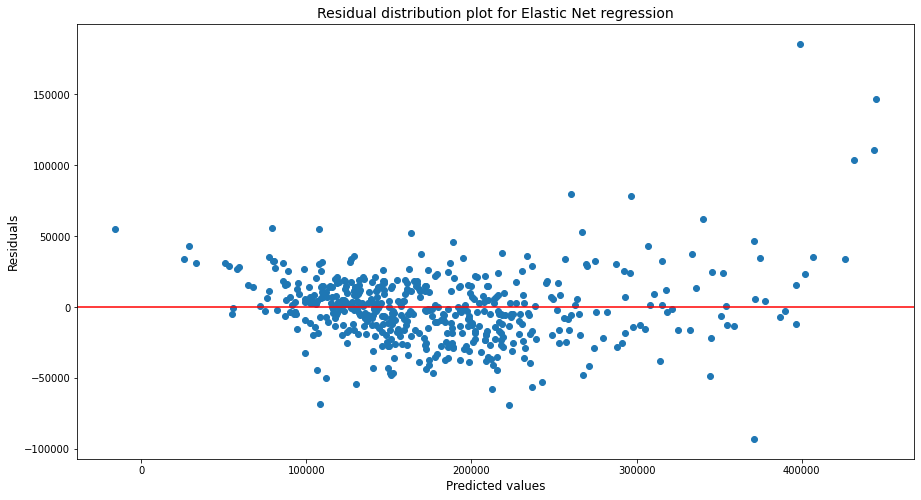

In [77]:
plt.figure(figsize=(15,8))

plt.scatter(enet_pred, enet_residuals)
plt.axhline(0, linestyle='-', color='r')
plt.title('Residual distribution plot for Elastic Net regression', fontsize=14)
plt.xlabel('Predicted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

---
## Dealing with outliers

As seen in the residuals plot above, there are 5 significant outliers
- 4 above zero line (upper right hand corner)
    - likely corresponds to the four points in the upper right hand corner of the scatter plot below (Actual sale price vs Predicted price in test set)
- 1 under zero line (lower right hand corner)
    - likely corresponds to the point in the lower left hand corner of the scatter plot below
    
#### The outliers in the residuals plot should not be dropped as these data points, although considered outliers, are legitimate sales data in the Ames housing data set. 

Text(0, 0.5, 'Predicted sale price')

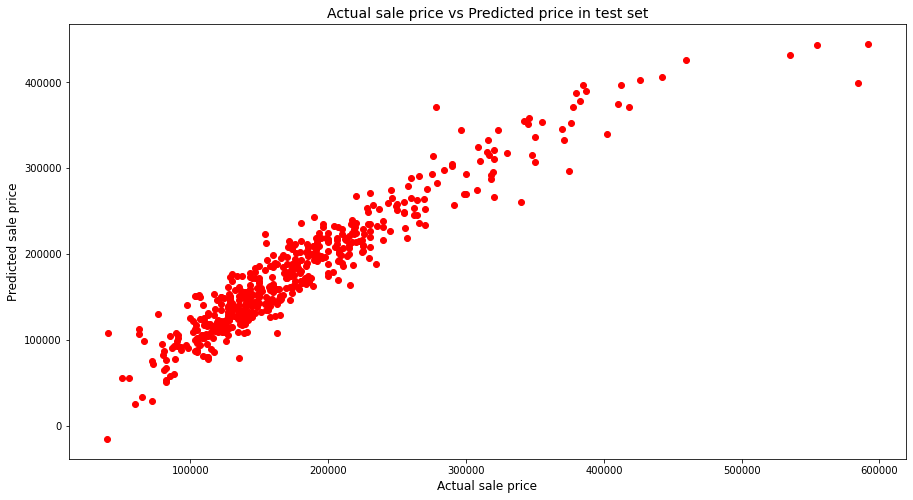

In [78]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, enet_pred, color='r')
plt.title('Actual sale price vs Predicted price in test set', fontsize=14)
plt.xlabel('Actual sale price', fontsize=12)
plt.ylabel('Predicted sale price', fontsize=12)

In [79]:
# verifying if the min and max saleprice correlates with the scatter plot above 
y_test.describe()

count       512.000000
mean     179357.390625
std       79691.389819
min       39300.000000
25%      128000.000000
50%      160000.000000
75%      210000.000000
max      591587.000000
Name: saleprice, dtype: float64

--- 
## Conclusion

The features matrix (final_features) modelled with an elastic net regression model is the production model for the Ames housing train data. It will be modelled on the Ames housing test dataset in the next notebook (Production Model and Insights), where I will also provide business recommendations based on the performance of the features in the data. 

The dataframe with only final_features will be exported as a .csv file to be used in the next notebook.

In [80]:
df_final_features = pd.DataFrame(train_dummies[final_features])

In [81]:
#exporting df_final_features
df_final_features.to_csv('../datasets/final_features.csv', index=False)